<a href="https://colab.research.google.com/github/Alejandro-ZZ/Deep-Learning/blob/master/Multilayer-Perceptron/Regression_Boston_Housing_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression | Keras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import boston_housing 
from keras import models, layers, optimizers

## **Dataset**

The Boston Housing price regression dataset is used for the development of this exercise. Data is divided as follows:

1. **Features:** contain 13 attributes of houses at different locations. The definition of each feature is defined in the [StatLib library](http://lib.stat.cmu.edu/datasets/boston)

2. **Targets** are the median values of the houses at a location (in k$).

In [ ]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


print('TRAIN SET:')
print(f'      data: {train_data.shape}')
print(f'    labels: {train_targets.shape}')
print('-'*40)
print('TEST SET:')
print(f'      data: {test_data.shape}')
print(f'    labels: {test_targets.shape}')
print('-'*40)

TRAIN SET:
      data: (404, 13)
    labels: (404,)
----------------------------------------
TEST SET:
      data: (102, 13)
    labels: (102,)
----------------------------------------


## **Normalization**

In [ ]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

## **Training params**

In [ ]:
EPOCHS = 80
BATCH_SIZE = 16

OPTIMIZER = 'rmsprop'
LOSS_FUNC = 'mse'
METRICS = ['mae']

## **Model**

In [ ]:
# Model's architecture
model_layers = [layers.Dense(64, activation="relu", name='Input_layer', input_shape=(train_data.shape[1],)),
                layers.Dense(64, activation="relu", name='layer2'),
                layers.Dense(1, activation="linear", name='Output_layer')]

#Compiling model
model = models.Sequential(layers=model_layers, name='Model1')
model.compile(optimizer=OPTIMIZER,
              loss=LOSS_FUNC,
              metrics=METRICS)
print(model.summary())

Model: "Model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 64)                896       
                                                                 
 layer2 (Dense)              (None, 64)                4160      
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
None


## **Train**

In [ ]:
# Number of folds
k = 4

# Samples per fold
fold_size = len(train_data) // 4

# Final results
all_results = []

print(f'[INFO] {k}-Fold Cross-Validation')
print(f'\n[INFO] Size of each fold: {fold_size}')

[INFO] 4-Fold Cross-Validation

[INFO] Size of each fold: 101


### K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=k, shuffle=True)

for i, (train_index, val_index) in enumerate(kf.split(train_data, train_targets)):
  print(f'[INFO] Training Fold #{i+1} ... ', end='')

  # Training data
  x_train = train_data[train_index]
  y_train = train_targets[train_index]
  # x_train = np.concatenate([train_data[:i*fold_size], train_data[(i+1)*fold_size:]], 
  #                           axis= 0)
  # y_train = np.concatenate([train_targets[:i*fold_size], train_targets[(i+1)*fold_size:]],
  #                          axis= 0)

  # Validation data
  x_val = train_data[val_index]
  y_val = train_targets[val_index]
  #   x_val = train_data[i*fold_size : (i+1)*fold_size]
  #   y_val = train_targets[i*fold_size : (i+1)*fold_size]

  # Training the model
  results = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, 
                      validation_data = (x_val, y_val), verbose=0)
  all_results.append(results.history)
  #all_history.append(history.history['val_mae'])

  print('OK')

[INFO] Training Fold #1 ...OK
[INFO] Training Fold #2 ...OK
[INFO] Training Fold #3 ...OK
[INFO] Training Fold #4 ...OK


### Loss Curves

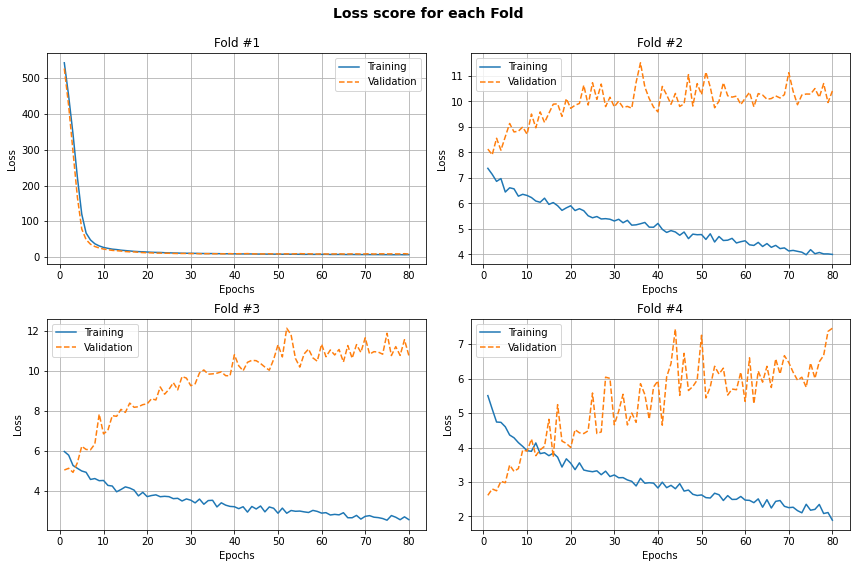

In [ ]:
figure = plt.figure(figsize=(12, 8))
rows = 2
cols = k//rows

for i, result in enumerate(all_results):
  figure.add_subplot(rows, cols, i+1)
  plt.plot(range(1, EPOCHS+1), result['loss'], label='Training')
  plt.plot(range(1, EPOCHS+1), result['val_loss'], '--', label='Validation')
  plt.title(f'Fold #{i+1}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid()

figure.suptitle(f'Loss score for each Fold', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### MAE Curves

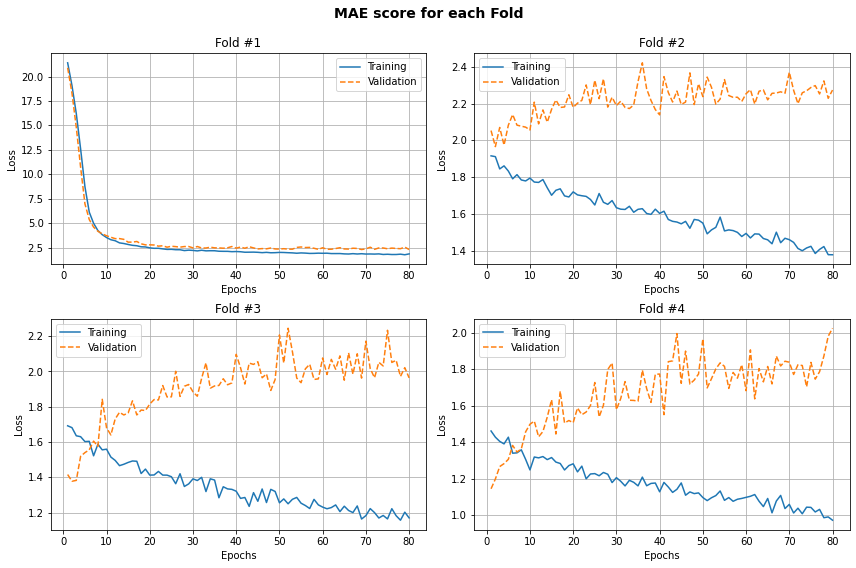

In [ ]:
figure = plt.figure(figsize=(12, 8))
rows = 2
cols = k//rows

for i, result in enumerate(all_results):
  figure.add_subplot(rows, cols, i+1)
  plt.plot(range(1, EPOCHS+1), result['mae'], label='Training')
  plt.plot(range(1, EPOCHS+1), result['val_mae'], '--', label='Validation')
  plt.title(f'Fold #{i+1}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid()

figure.suptitle(f'MAE score for each Fold', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Average Curves

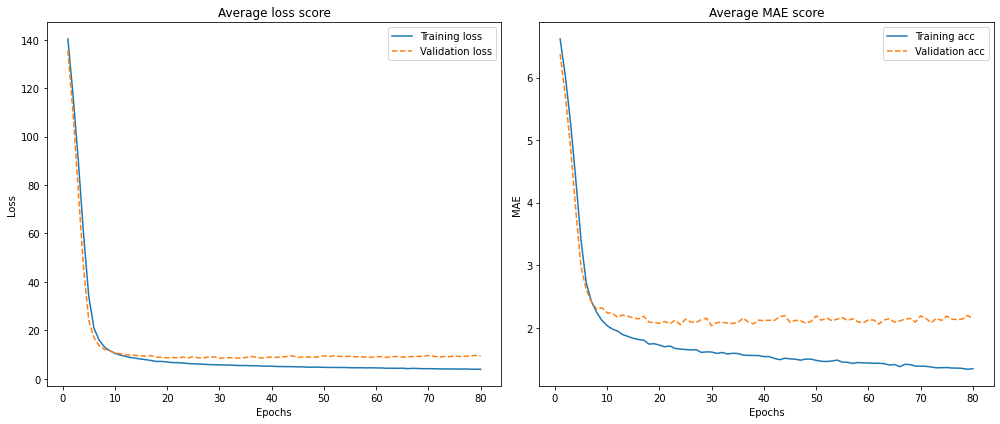

In [ ]:
avg_mae = pd.DataFrame([result['mae'] for result in all_results]).mean(axis=0).to_numpy()
avg_val_mae = pd.DataFrame([result['val_mae'] for result in all_results]).mean(axis=0).to_numpy()
avg_loss = pd.DataFrame([result['loss'] for result in all_results]).mean(axis=0).to_numpy()
avg_val_loss = pd.DataFrame([result['val_loss'] for result in all_results]).mean(axis=0).to_numpy()


figure = plt.figure(figsize=(14, 6))

figure.add_subplot(1, 2, 1)
plt.plot(range(1, EPOCHS+1), avg_loss, label='Training loss')
plt.plot(range(1, EPOCHS+1), avg_val_loss, '--', label='Validation loss')
plt.title('Average loss score')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

figure.add_subplot(1, 2, 2)
plt.plot(range(1, EPOCHS+1), avg_mae, label='Training acc')
plt.plot(range(1, EPOCHS+1), avg_val_mae, '--', label='Validation acc')
plt.title('Average MAE score')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

## **Test**

In [ ]:
model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 12.0318 - mae: 2.5111


[12.0317964553833, 2.5110809803009033]